# OPS-SAT Anomaly Detection

OPSSAT-AD is an AI-ready benchmark dataset of telemetry collected from OPS‑SAT, a CubeSat mission operated by the European Space Agency (ESA). 
The dataset provides engineered telemetry features for benchmarking anomaly detection and other machine-learning tasks.

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

## Load Dataset

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,segment,anomaly,train,channel,sampling,duration,len,mean,var,std,...,smooth10_n_peaks,smooth20_n_peaks,diff_peaks,diff2_peaks,diff_var,diff2_var,gaps_squared,len_weighted,var_div_duration,var_div_len
0,1,1,1,CADC0872,1,279,280,8.533143e-07,3.494283e-10,0.000019,...,3,2,4,6,1.271176e-10,2.960666e-10,279,280,1.252431e-12,1.247958e-12
1,2,1,1,CADC0872,1,476,477,-3.639396e-06,6.476485e-10,0.000025,...,1,1,5,8,1.489383e-12,3.004752e-12,476,477,1.360606e-12,1.357754e-12
2,3,1,1,CADC0872,1,594,595,1.170788e-05,5.592877e-10,0.000024,...,2,2,2,3,4.112280e-12,1.029918e-11,594,595,9.415618e-13,9.399794e-13
3,4,1,1,CADC0872,1,271,272,8.486808e-07,5.466024e-10,0.000023,...,2,2,3,6,2.475760e-11,6.240985e-11,271,272,2.016983e-12,2.009568e-12
4,5,0,0,CADC0872,1,256,257,1.058485e-05,5.279023e-10,0.000023,...,1,1,78,87,5.547101e-13,7.035422e-13,256,257,2.062118e-12,2.054094e-12


## Preprocessing

In [3]:
if 'segment' in df.columns: df = df.drop(columns=['segment'])
if 'train' in df.columns: df = df.drop(columns=['train'])
if 'channel' in df.columns:
    df['channel'] = LabelEncoder().fit_transform(df['channel'])

X = df.drop(columns=['anomaly'])
y = df['anomaly']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42,stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_scaled_all = scaler.transform(X)

## Dataset Overview

In [4]:
df.describe()

,anomaly,channel,sampling,duration,len,mean,var,std,kurtosis,skew,...,smooth10_n_peaks,smooth20_n_peaks,diff_peaks,diff2_peaks,diff_var,diff2_var,gaps_squared,len_weighted,var_div_duration,var_div_len
count,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2.123000e+03,2.123000e+03,2123.000000,2123.000000,2123.000000,...,2123.000000,2123.000000,2123.000000,2123.000000,2.123000e+03,2.123000e+03,2123.000000,2123.000000,2.123000e+03,2.123000e+03
mean,0.204428,2.577485,3.505888,265.613754,142.954781,1.109677e-01,3.065868e-02,0.096226,-1.085494,0.175551,...,1.110221,1.181818,18.110692,25.286387,9.166359e-04,1.045846e-03,999.228450,267.925106,1.176063e-04,4.361427e-04
std,0.403378,2.678325,1.935418,167.158550,152.329786,1.963165e-01,5.491161e-02,0.146319,1.000566,0.529314,...,0.399227,0.425295,28.991979,32.737797,4.196259e-03,1.127395e-02,1565.349081,166.245528,2.119295e-04,8.845658e-04
min,0.000000,0.000000,1.000000,35.000000,8.000000,-3.833030e-05,1.422763e-11,0.000004,-1.858813,-1.509396,...,0.000000,0.000000,0.000000,0.000000,1.962330e-13,3.875356e-13,104.000000,40.000000,2.817267e-14,4.404840e-14
25%,0.000000,0.000000,1.000000,175.000000,40.000000,-7.239804e-07,2.960552e-10,0.000017,-1.449123,-0.117719,...,1.000000,1.000000,1.000000,4.000000,3.163852e-12,1.233331e-12,295.000000,175.000000,1.309137e-12,2.809916e-12
50%,0.000000,1.000000,5.000000,225.000000,70.000000,4.515496e-06,6.032890e-10,0.000025,-1.302729,0.006758,...,1.000000,1.000000,5.000000,14.000000,3.640618e-11,1.095135e-11,500.000000,230.000000,3.786876e-12,1.563517e-11
75%,0.000000,5.000000,5.000000,330.000000,201.000000,2.051710e-01,3.738843e-02,0.193361,-0.996211,0.538015,...,1.000000,1.000000,21.000000,32.000000,2.982598e-04,1.402282e-04,1200.000000,330.000000,1.886576e-04,4.718514e-04
max,1.000000,8.000000,5.000000,1335.000000,1040.000000,1.118632e+00,2.724801e-01,0.521996,31.201842,4.374560,...,5.000000,4.000000,240.000000,256.000000,9.987869e-02,3.033986e-01,20750.000000,1340.000000,1.686516e-03,8.031028e-03


## Class Distribution

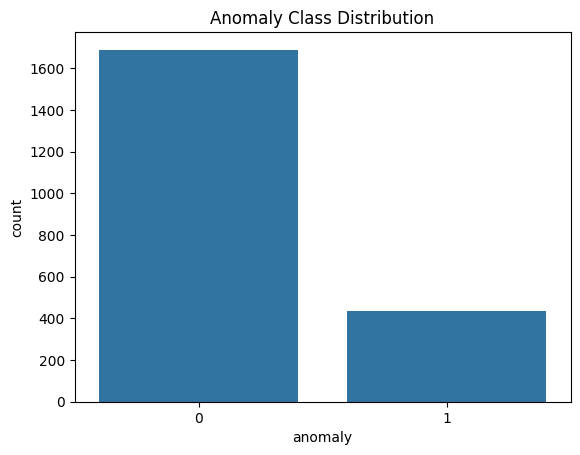

In [5]:
sns.countplot(x=y); 
plt.title('Anomaly Class Distribution'); 
plt.show()


This bar chart shows the counts and percentages for each class in the `anomaly` target. A large imbalance (one class much larger than the other) may bias classifiers toward the majority class; if present, consider resampling (e.g., SMOTE), class weighting, or anomaly-specific models.


## Correlation Heatmap

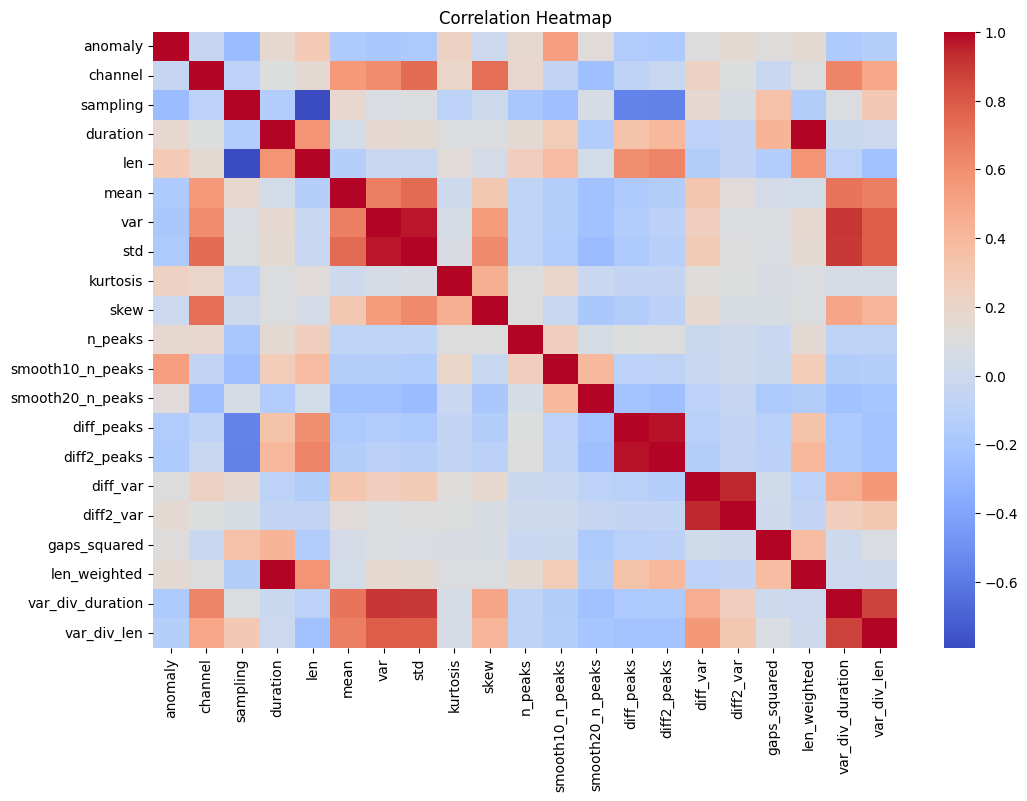

In [6]:
plt.figure(figsize=(12,8)); 
sns.heatmap(df.corr(), cmap='coolwarm'); 
plt.title('Correlation Heatmap'); 
plt.show()


The correlation heatmap visualizes pairwise linear correlations between numeric features. Strong correlation (absolute value near 1) indicates potential multicollinearity which can affect some models; consider removing or combining correlated features or using dimensionality reduction. Interpret this heatmap alongside domain knowledge.


## PCA Visualization

Explained variance ratio: [0.27955242 0.1913322 ]


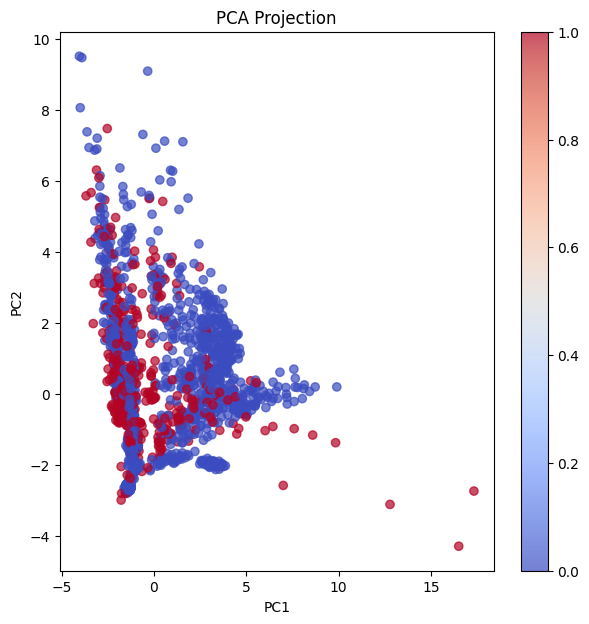

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

features_for_pca = X_scaled_all if 'X_scaled_all' in globals() else X
p = pca.fit_transform(features_for_pca)

print("Explained variance ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(7,7))
plt.scatter(p[:,0], p[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.colorbar()
plt.show()

The PCA scatter shows projection of telemetry onto the first two principal components (computed on scaled features). The printed explained variance ratio indicates how much variance each principal component captures; low explained variance suggests higher-dimensional structure remains.


## Logistic Regression

Accuracy: 0.9278
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       507
           1       0.94      0.69      0.80       130

    accuracy                           0.93       637
   macro avg       0.93      0.84      0.88       637
weighted avg       0.93      0.93      0.92       637



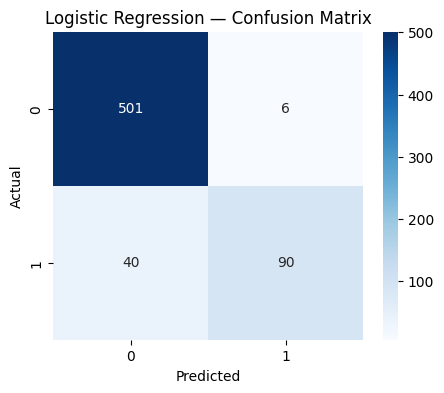

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)
print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test, preds, zero_division=0))

cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression — Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic Regression is a linear classifier suitable for baseline evaluation on binary targets; the confusion matrix below shows true vs predicted labels and helps identify types of errors (false positives vs false negatives).

## Random Forest

Accuracy: 0.9545
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       507
           1       0.96      0.81      0.88       130

    accuracy                           0.95       637
   macro avg       0.96      0.90      0.93       637
weighted avg       0.95      0.95      0.95       637



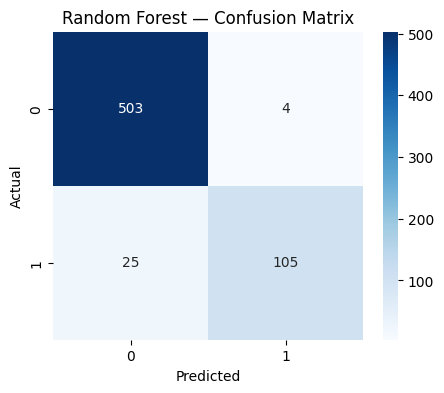

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier()
model.fit(X_train, y_train)

preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)
print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test, preds, zero_division=0))

cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest — Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest is an ensemble method that reduces variance and typically performs well with mixed feature types; check feature importances if you want interpretable drivers for predictions.

## Support Vector Machine

Accuracy: 0.9466
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       507
           1       0.97      0.76      0.85       130

    accuracy                           0.95       637
   macro avg       0.96      0.88      0.91       637
weighted avg       0.95      0.95      0.94       637



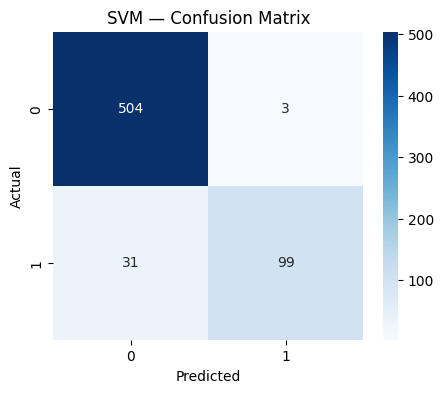

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = SVC()
model.fit(X_train, y_train)

preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)
print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test, preds, zero_division=0))

cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM — Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Support Vector Machine (SVM) attempts to find a separating hyperplane; kernel choice and scaling are important. The confusion matrix helps reveal types of misclassification.

## Naive Bayes

Accuracy: 0.9011
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       507
           1       0.89      0.58      0.71       130

    accuracy                           0.90       637
   macro avg       0.90      0.78      0.82       637
weighted avg       0.90      0.90      0.89       637



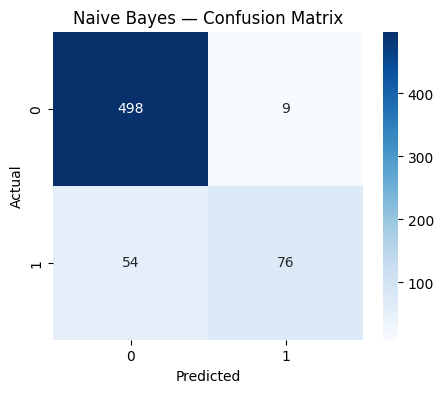

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = GaussianNB()
model.fit(X_train, y_train)

preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)
print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test, preds, zero_division=0))

cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes — Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Gaussian Naive Bayes assumes feature independence and works well when that assumption roughly holds; it is lightweight and fast to train.

## Decision Tree

Accuracy: 0.9435
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       507
           1       0.87      0.85      0.86       130

    accuracy                           0.94       637
   macro avg       0.91      0.91      0.91       637
weighted avg       0.94      0.94      0.94       637



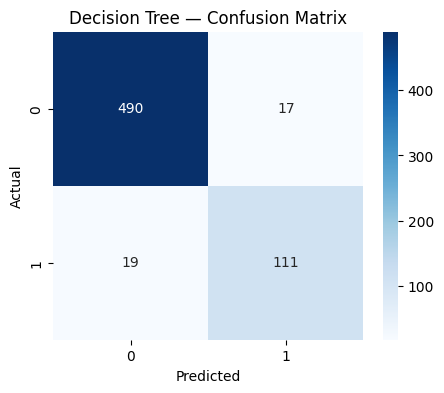

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)
print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test, preds, zero_division=0))

cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree — Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree is a simple, interpretable model that can overfit if not pruned; examine the confusion matrix to check for class-specific errors.

## KNN

Accuracy: 0.9529
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       507
           1       0.99      0.78      0.87       130

    accuracy                           0.95       637
   macro avg       0.97      0.89      0.92       637
weighted avg       0.95      0.95      0.95       637



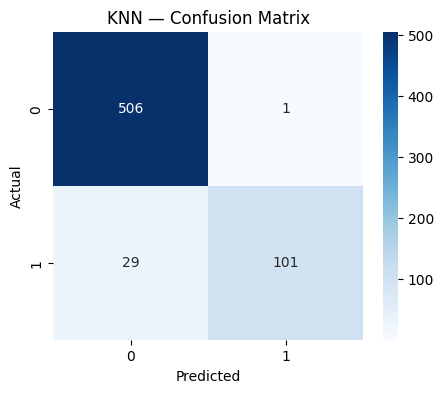

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = KNeighborsClassifier()
model.fit(X_train, y_train)

preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)
print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test, preds, zero_division=0))

cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('KNN — Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

K-Nearest Neighbors (KNN) predicts labels using nearby instances; it is sensitive to feature scaling and the choice of k.

## Model Comparison

,Model,Accuracy
0,RandomForest,0.956044
1,KNN,0.952904
2,SVM,0.946625
3,DecisionTree,0.941915
4,LogisticRegression,0.927786
5,NaiveBayes,0.901099


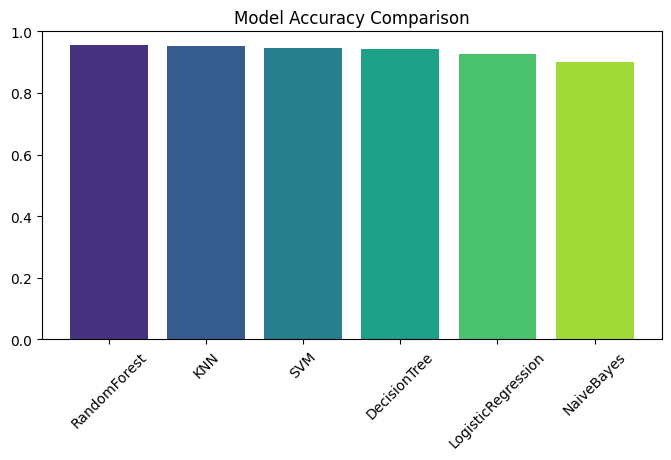

In [14]:
results = {}
for name, obj in {
    "LogisticRegression": LogisticRegression(max_iter=500),
    "RandomForest": RandomForestClassifier(),
    "SVM": SVC(),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}.items():
    obj.fit(X_train, y_train)
    results[name] = accuracy_score(y_test, obj.predict(X_test))

results_df = pd.DataFrame(results.items(), columns=['Model','Accuracy']).sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
display(results_df)

plt.figure(figsize=(8,4))
colors = sns.color_palette('viridis', n_colors=len(results_df))
plt.bar(results_df['Model'], results_df['Accuracy'], color=colors)
plt.ylim(0,1)
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()